In [1]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
pre = pd.read_csv('./datasets/comparison_feature_data/train_pre.csv')
mid = pd.read_csv('./datasets/comparison_feature_data/train_mid.csv')
late = pd.read_csv('./datasets/comparison_feature_data/train_late.csv')

pre_all = pd.read_csv('./datasets/all_feature_data/train_pre.csv')
mid_all = pd.read_csv('./datasets/all_feature_data/train_mid.csv')
late_all = pd.read_csv('./datasets/all_feature_data/train_late.csv')

In [3]:
def runModel(data_train,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    #Creating a copy of data
    X_scale = X_train.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale)
    X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
    train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)
    #fit model
    DCT = DecisionTreeClassifier(max_depth=max_depth)
    DCT.fit(train_X,train_Y)
    y_predict = DCT.predict(test_X)
    #print accuracy
    print(classification_report(y_true=test_Y,y_pred=y_predict))
    #plot tree
    plt.figure()
    plt.figure(dpi=200,figsize=(16,10))
    plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
    plt.title("Decision tree trained after pruning")
    plt.show()
    return DCT

In [4]:
# #Grid Search
# X_train, Y_train = mid.drop(['TeamVictory'],axis=1),mid[['TeamVictory']]
# #Creating a copy of data
# X_scale = X_train.copy()
# #Scaling
# scaler = StandardScaler()
# scaler.fit(X_scale)
# X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
# train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)

# param_grid = [
#         {
#             'max_depth' : range(1,20),
            
#         }
#        ]

# clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y)


# print("Best parameters set found on development set:")
# print(clf.best_params_)

              precision    recall  f1-score   support

         100       0.59      0.68      0.63       969
         200       0.64      0.54      0.58      1001

    accuracy                           0.61      1970
   macro avg       0.61      0.61      0.61      1970
weighted avg       0.61      0.61      0.61      1970



<Figure size 432x288 with 0 Axes>

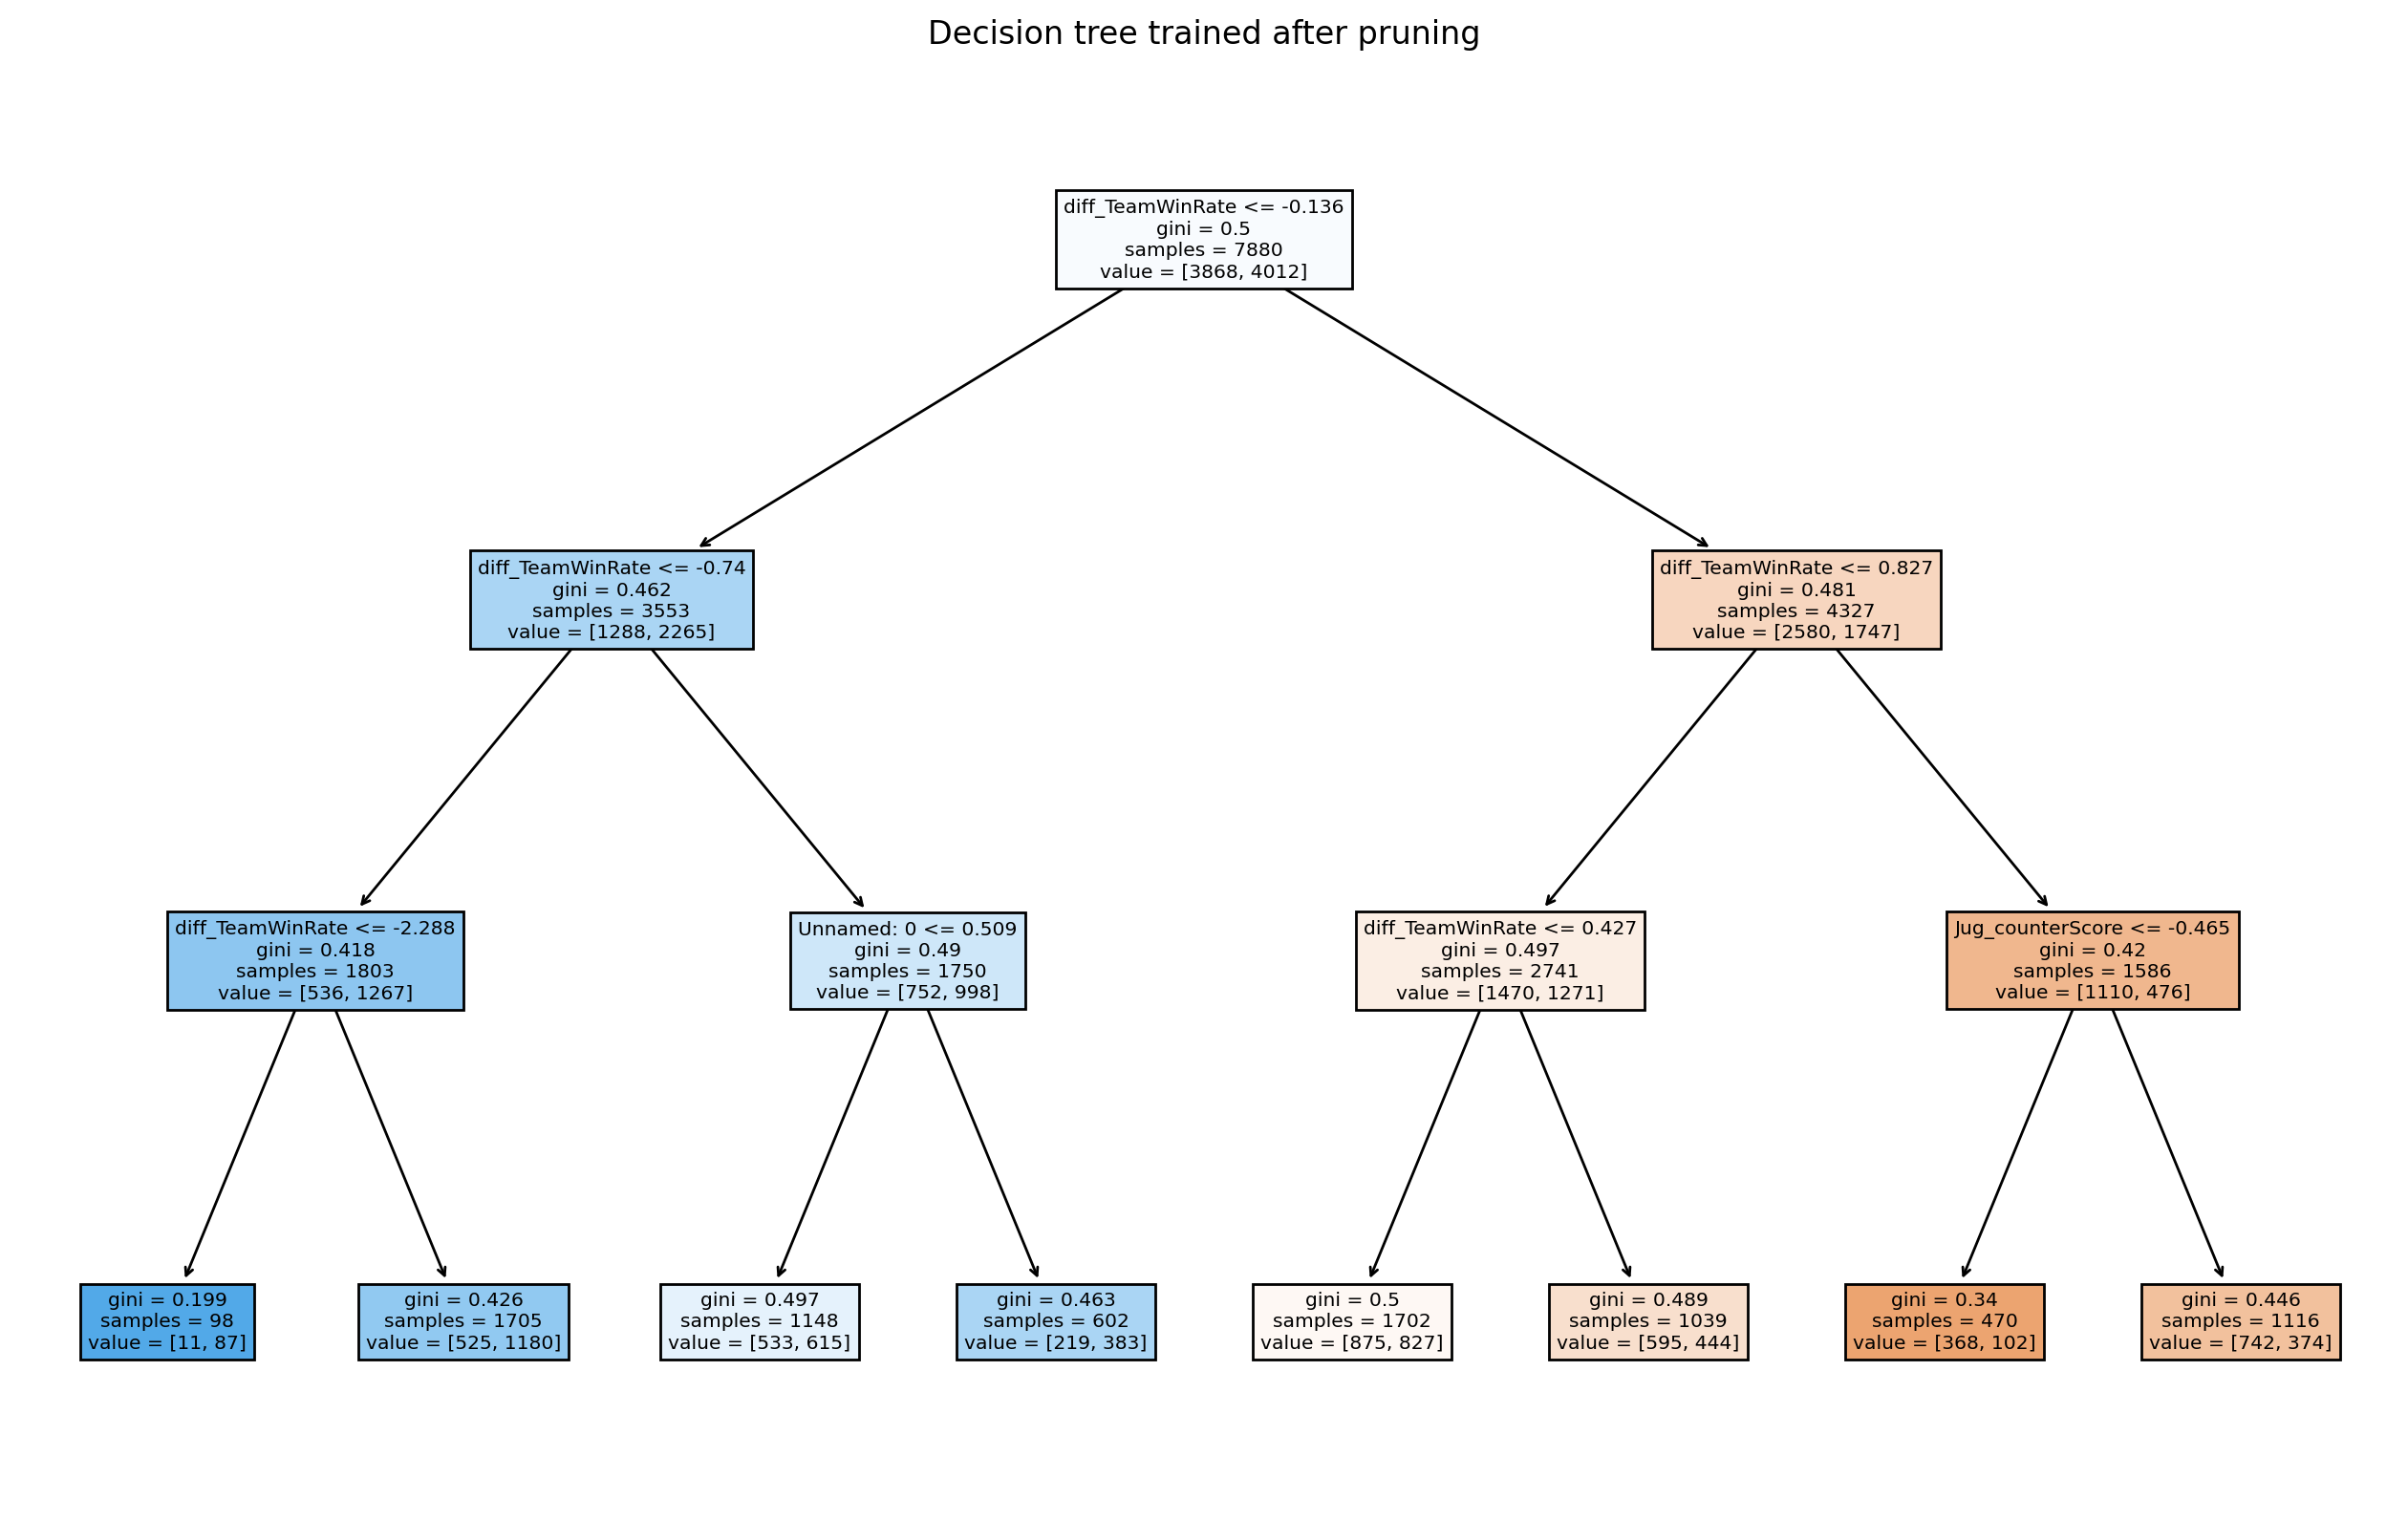

              precision    recall  f1-score   support

         100       0.54      0.60      0.57      4643
         200       0.59      0.53      0.56      5111

    accuracy                           0.56      9754
   macro avg       0.56      0.56      0.56      9754
weighted avg       0.57      0.56      0.56      9754



<Figure size 432x288 with 0 Axes>

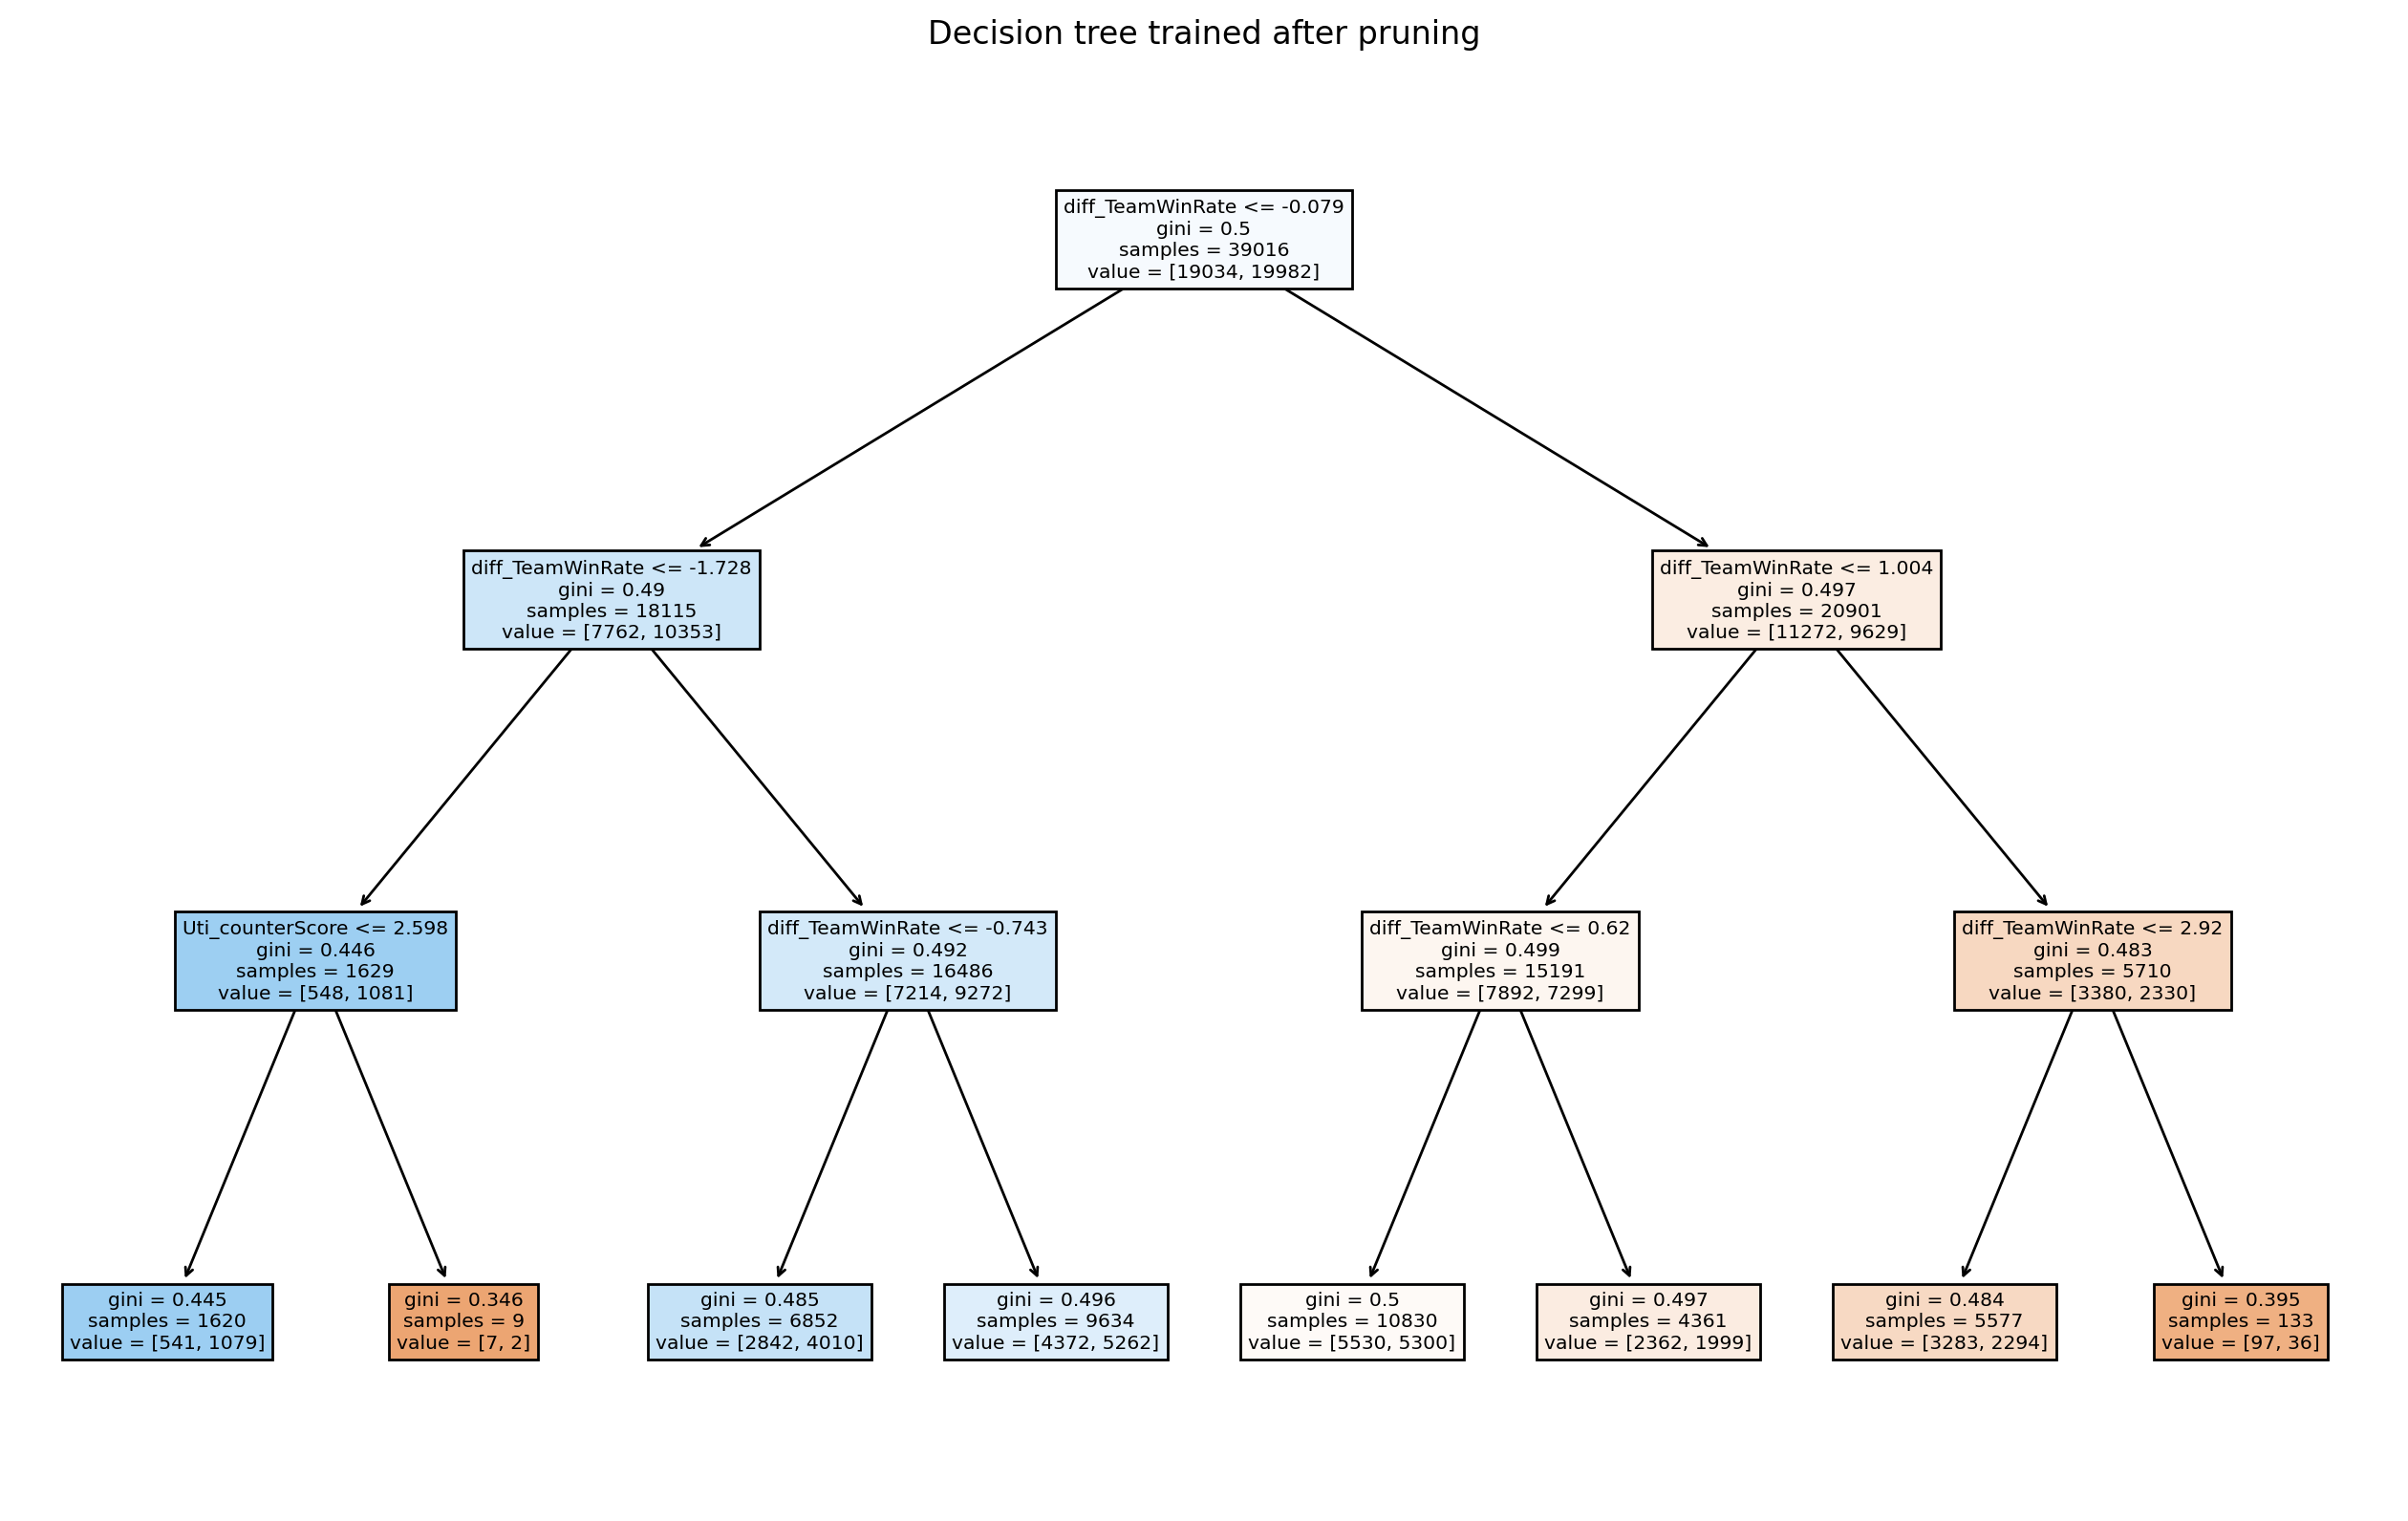

              precision    recall  f1-score   support

         100       0.53      0.55      0.54      2606
         200       0.56      0.54      0.55      2798

    accuracy                           0.55      5404
   macro avg       0.55      0.55      0.55      5404
weighted avg       0.55      0.55      0.55      5404



<Figure size 432x288 with 0 Axes>

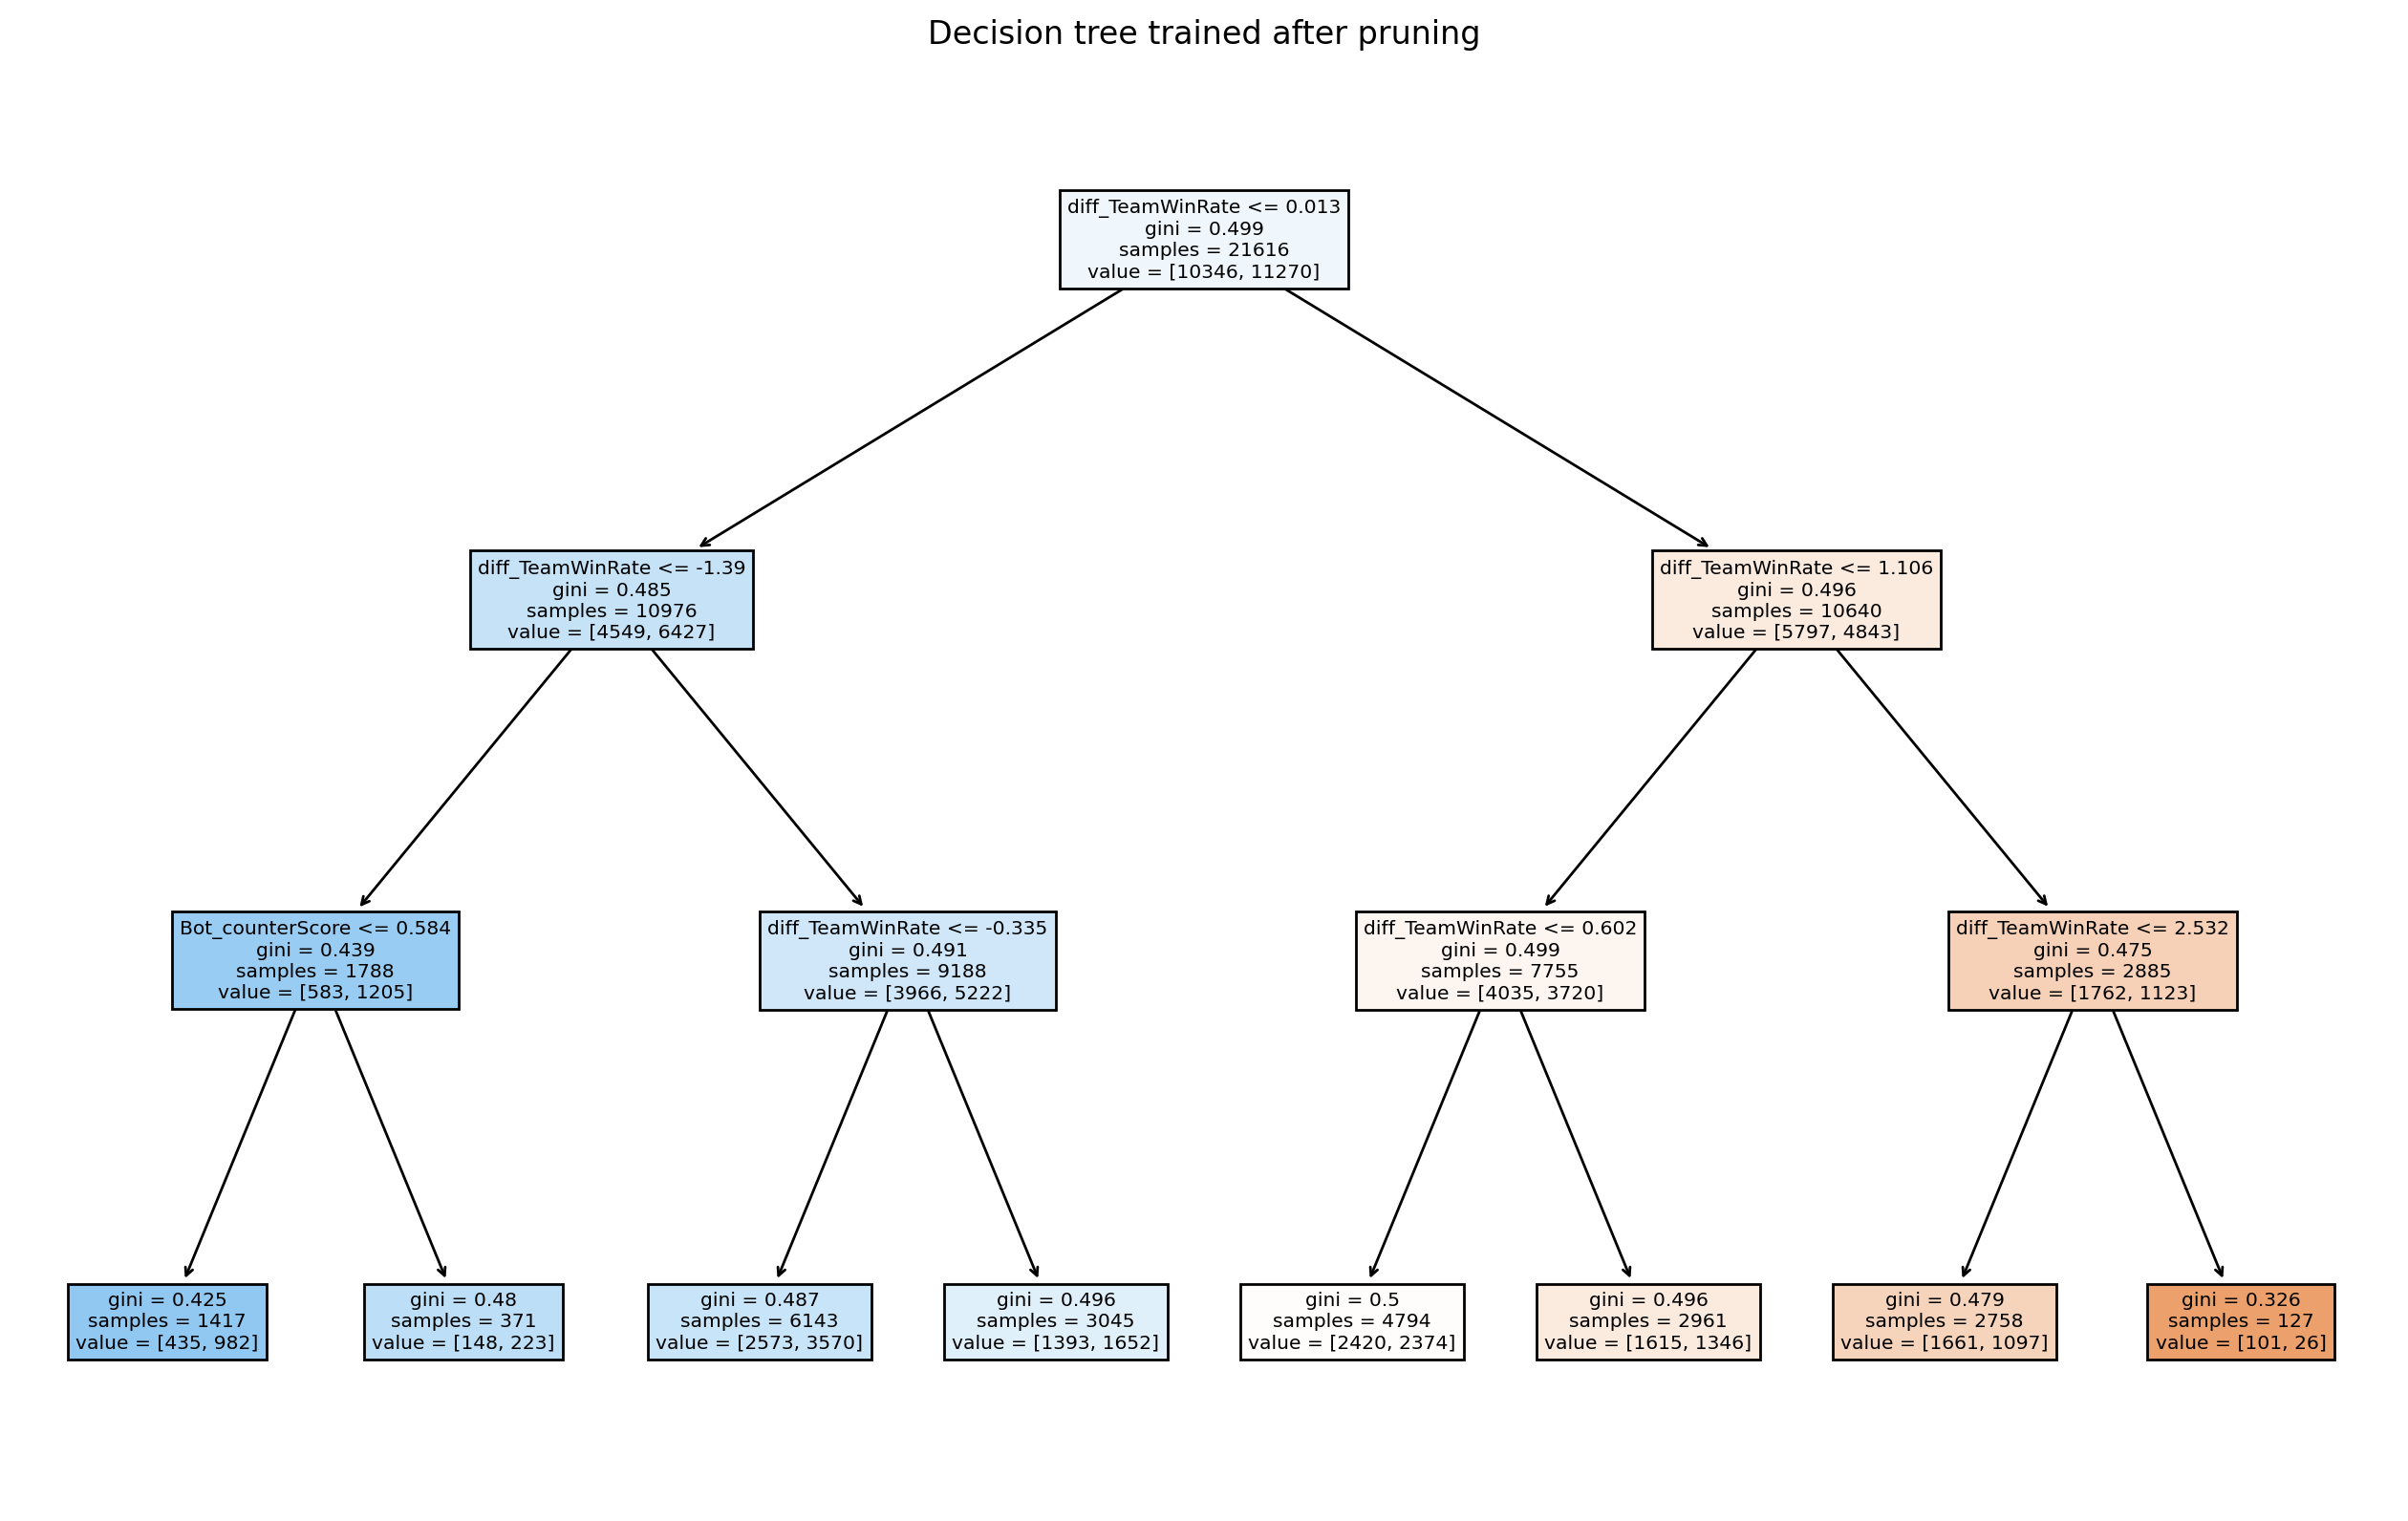

DecisionTreeClassifier(max_depth=3)

In [5]:
runModel(pre,3)
runModel(mid,3)
runModel(late,3)

In [6]:
# import time

# feature_names = [train_X.columns[range(0,11)]]
# start_time = time.time()
# importances = RDF.feature_importances_
# std = np.std([tree.feature_importances_ for tree in RDF.estimators_], axis=0)
# elapsed_time = time.time() - start_time
# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [7]:
# DCT = DecisionTreeClassifier(max_depth=1)
# DCT.fit(train_X,train_Y)
# y_predict = DCT.predict(test_X)

# print(classification_report(y_true=test_Y,y_pred=y_predict))

# #plot the decision tree with unlimited max depth
# plt.figure()
# plt.figure(dpi=800,figsize=(8,5))
# plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
# plt.title("Decision tree trained after pruning")
# plt.show()

              precision    recall  f1-score   support

         100       0.55      0.67      0.60       969
         200       0.59      0.46      0.52      1001

    accuracy                           0.56      1970
   macro avg       0.57      0.57      0.56      1970
weighted avg       0.57      0.56      0.56      1970



<Figure size 432x288 with 0 Axes>

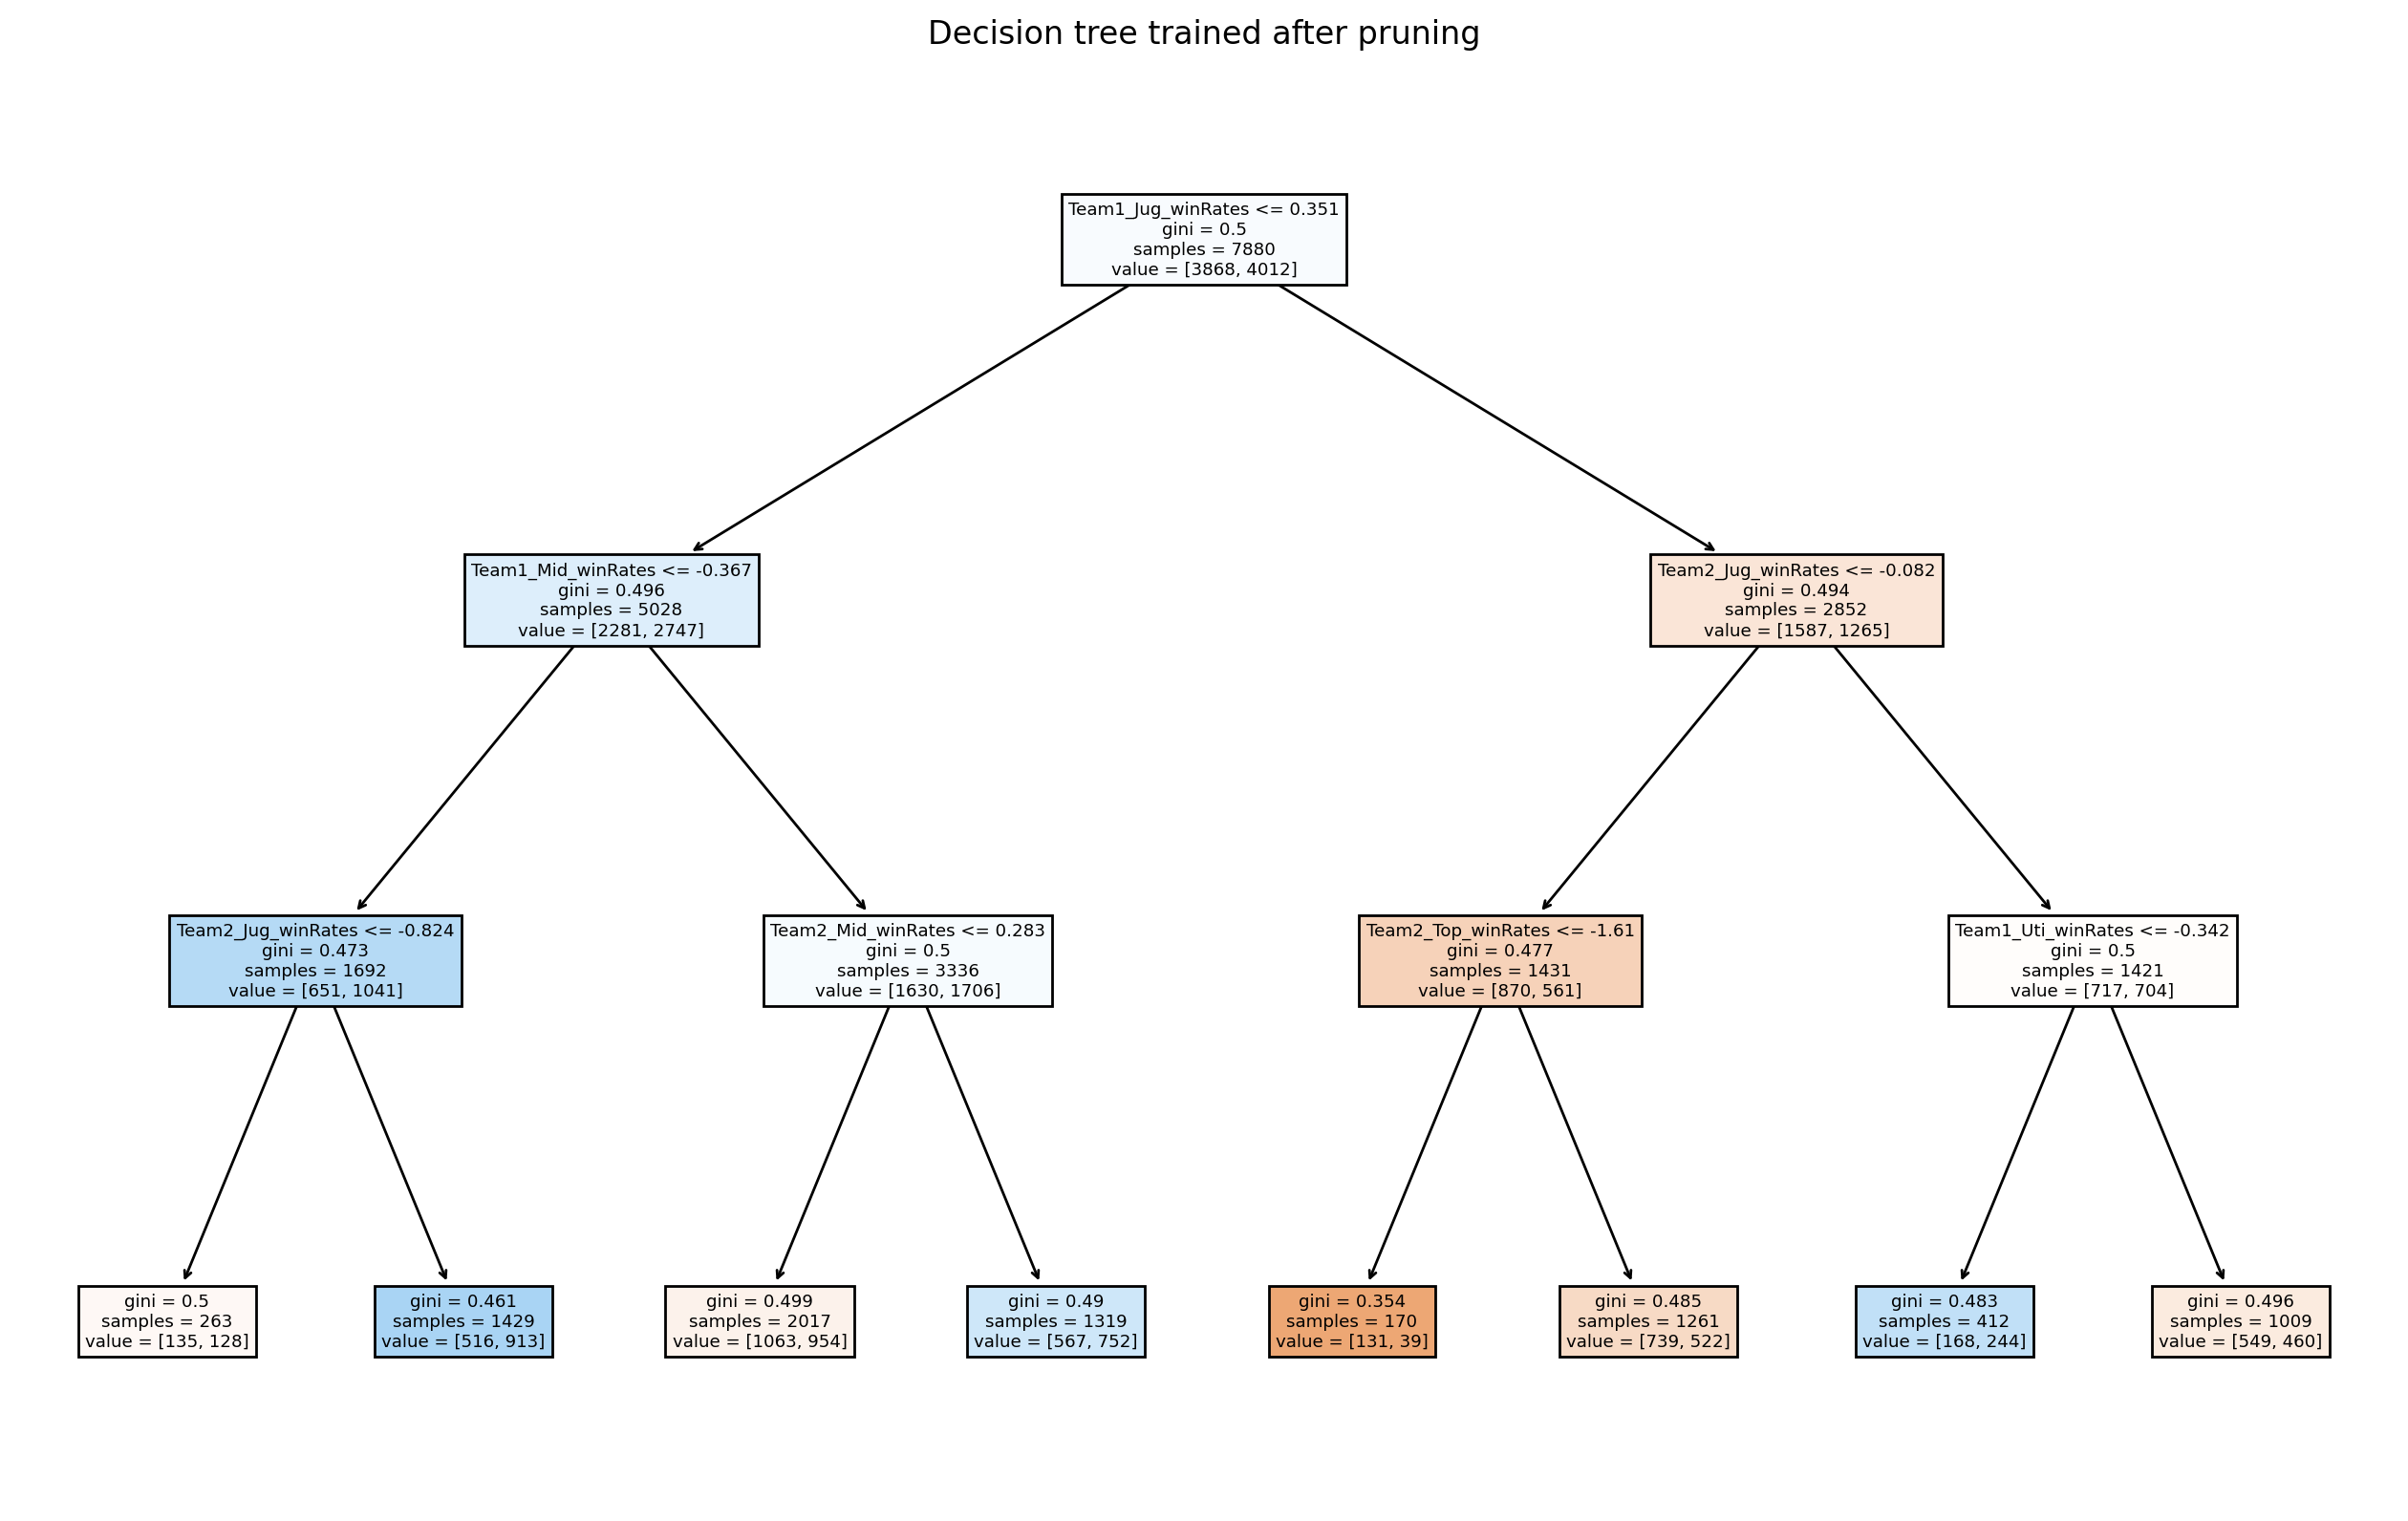

              precision    recall  f1-score   support

         100       0.51      0.52      0.52      4643
         200       0.56      0.56      0.56      5111

    accuracy                           0.54      9754
   macro avg       0.54      0.54      0.54      9754
weighted avg       0.54      0.54      0.54      9754



<Figure size 432x288 with 0 Axes>

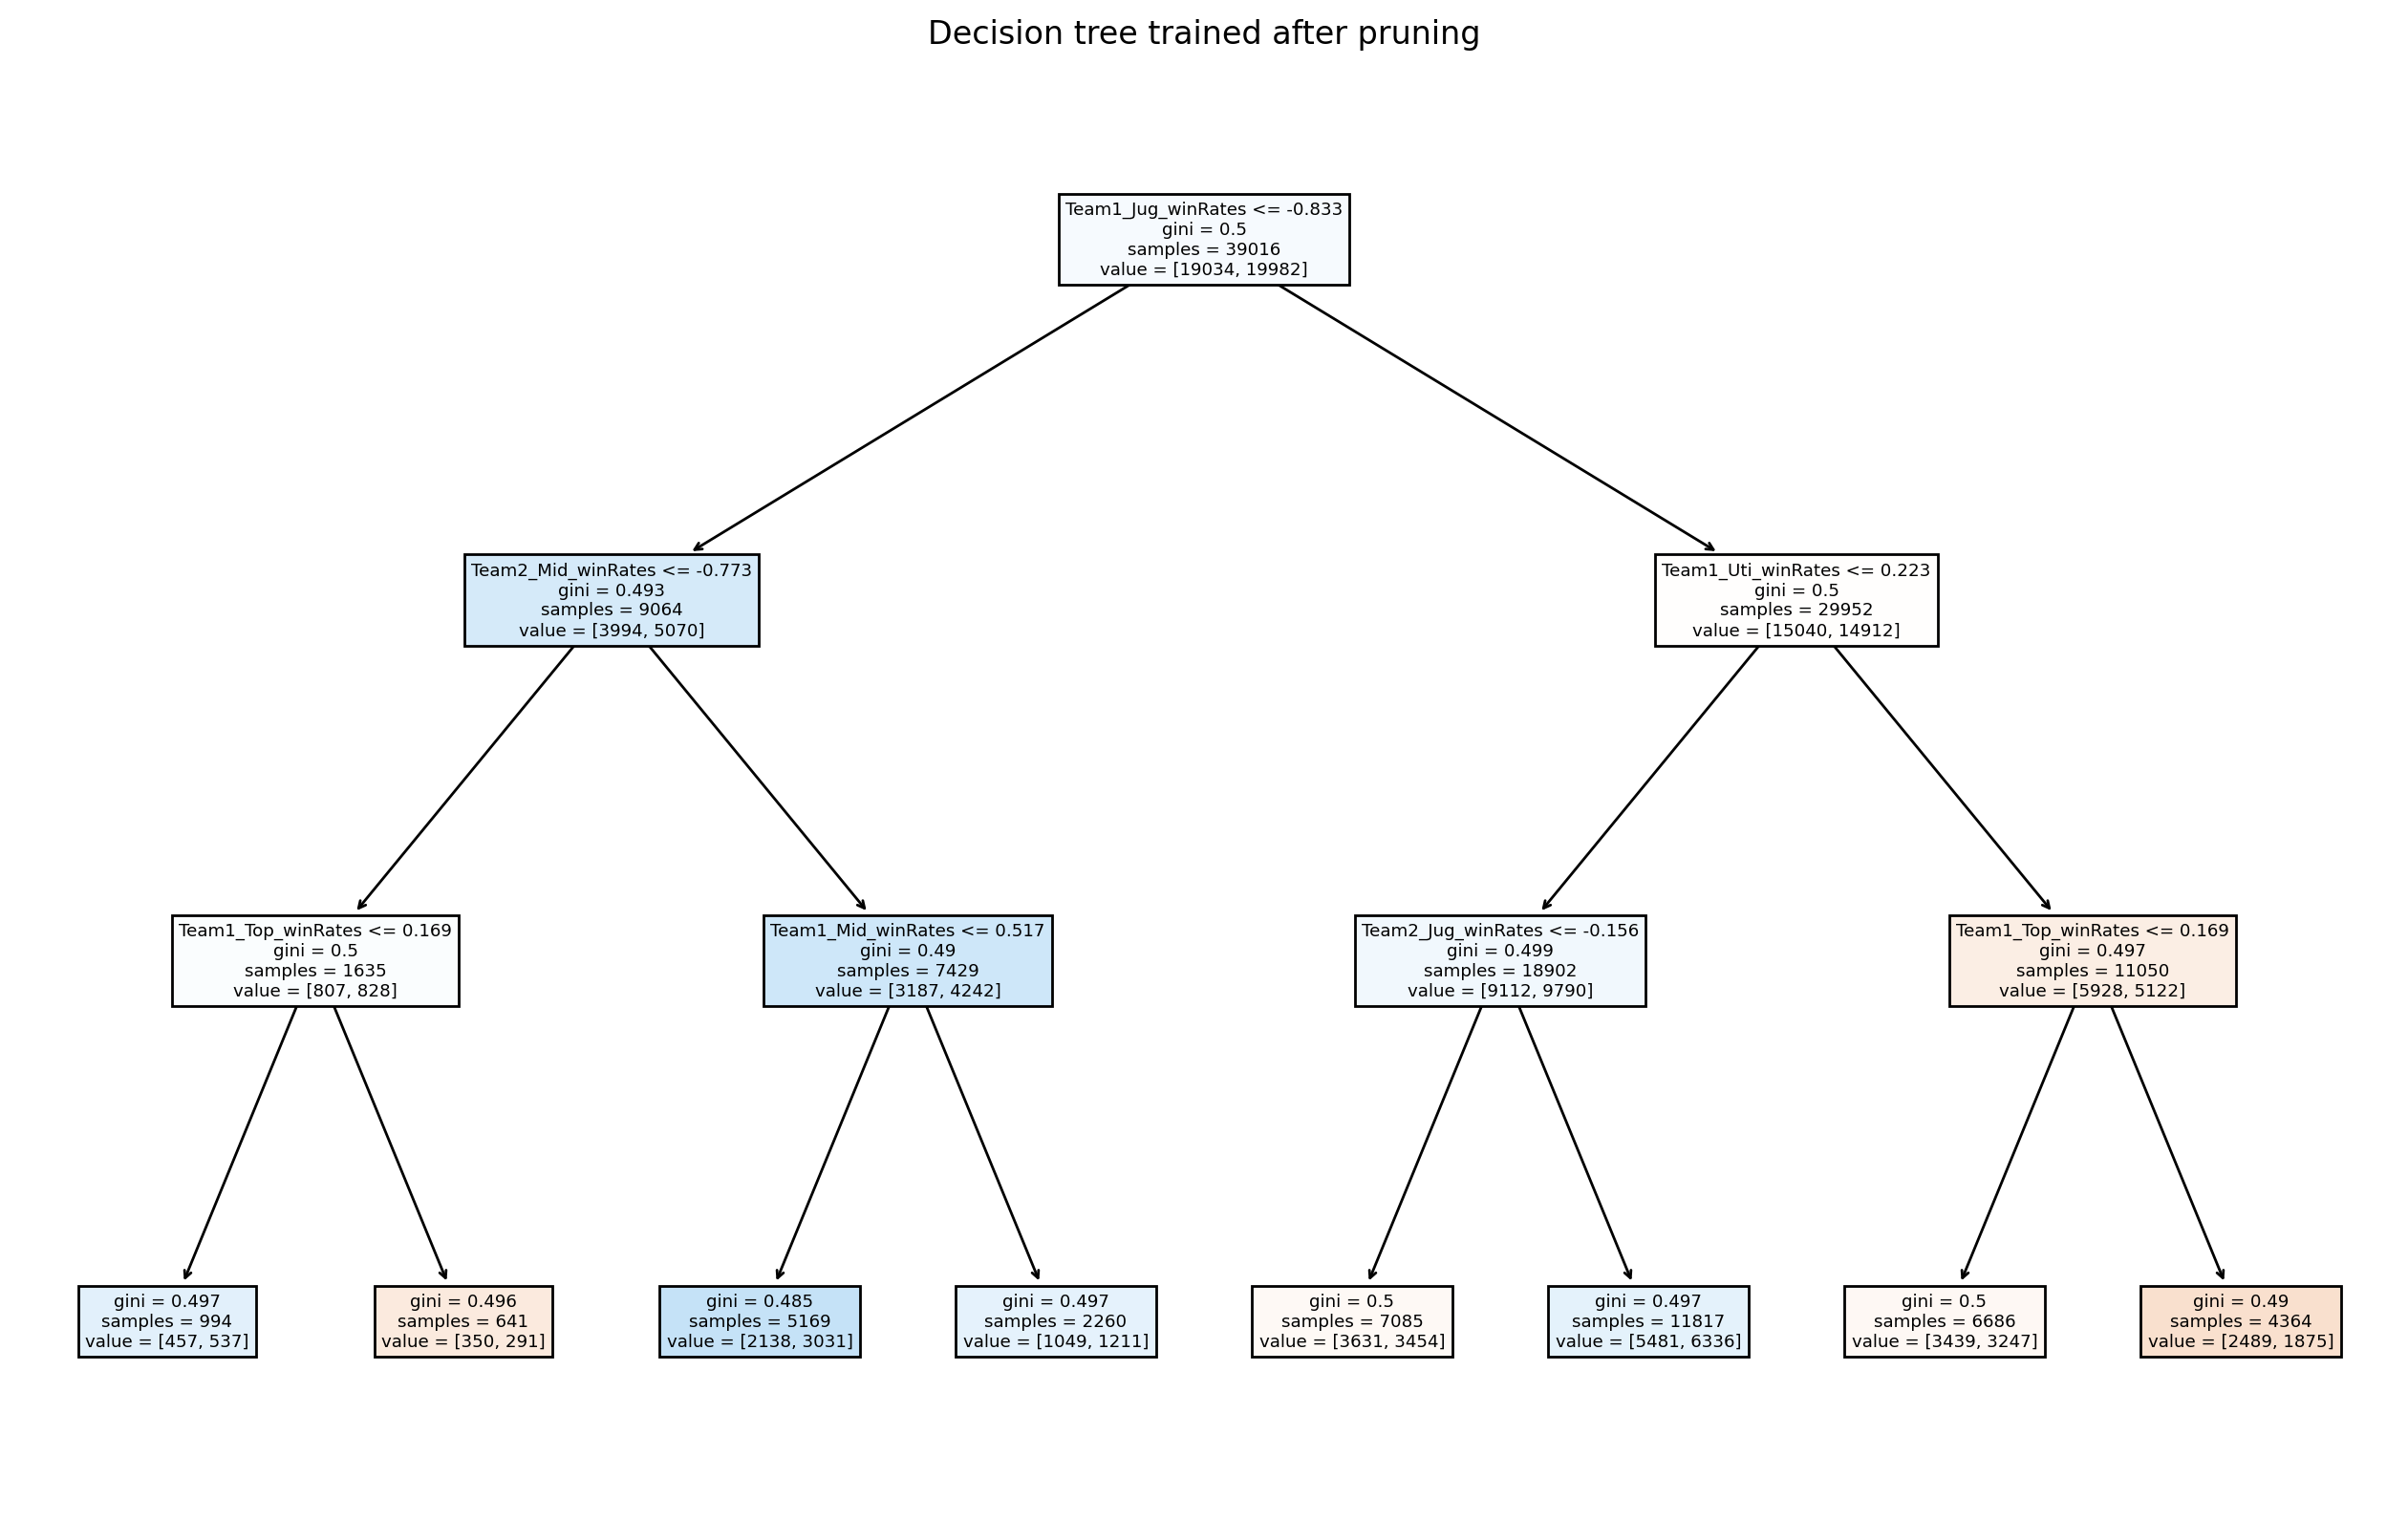

              precision    recall  f1-score   support

         100       0.51      0.27      0.35      2606
         200       0.53      0.76      0.62      2798

    accuracy                           0.52      5404
   macro avg       0.52      0.51      0.49      5404
weighted avg       0.52      0.52      0.49      5404



<Figure size 432x288 with 0 Axes>

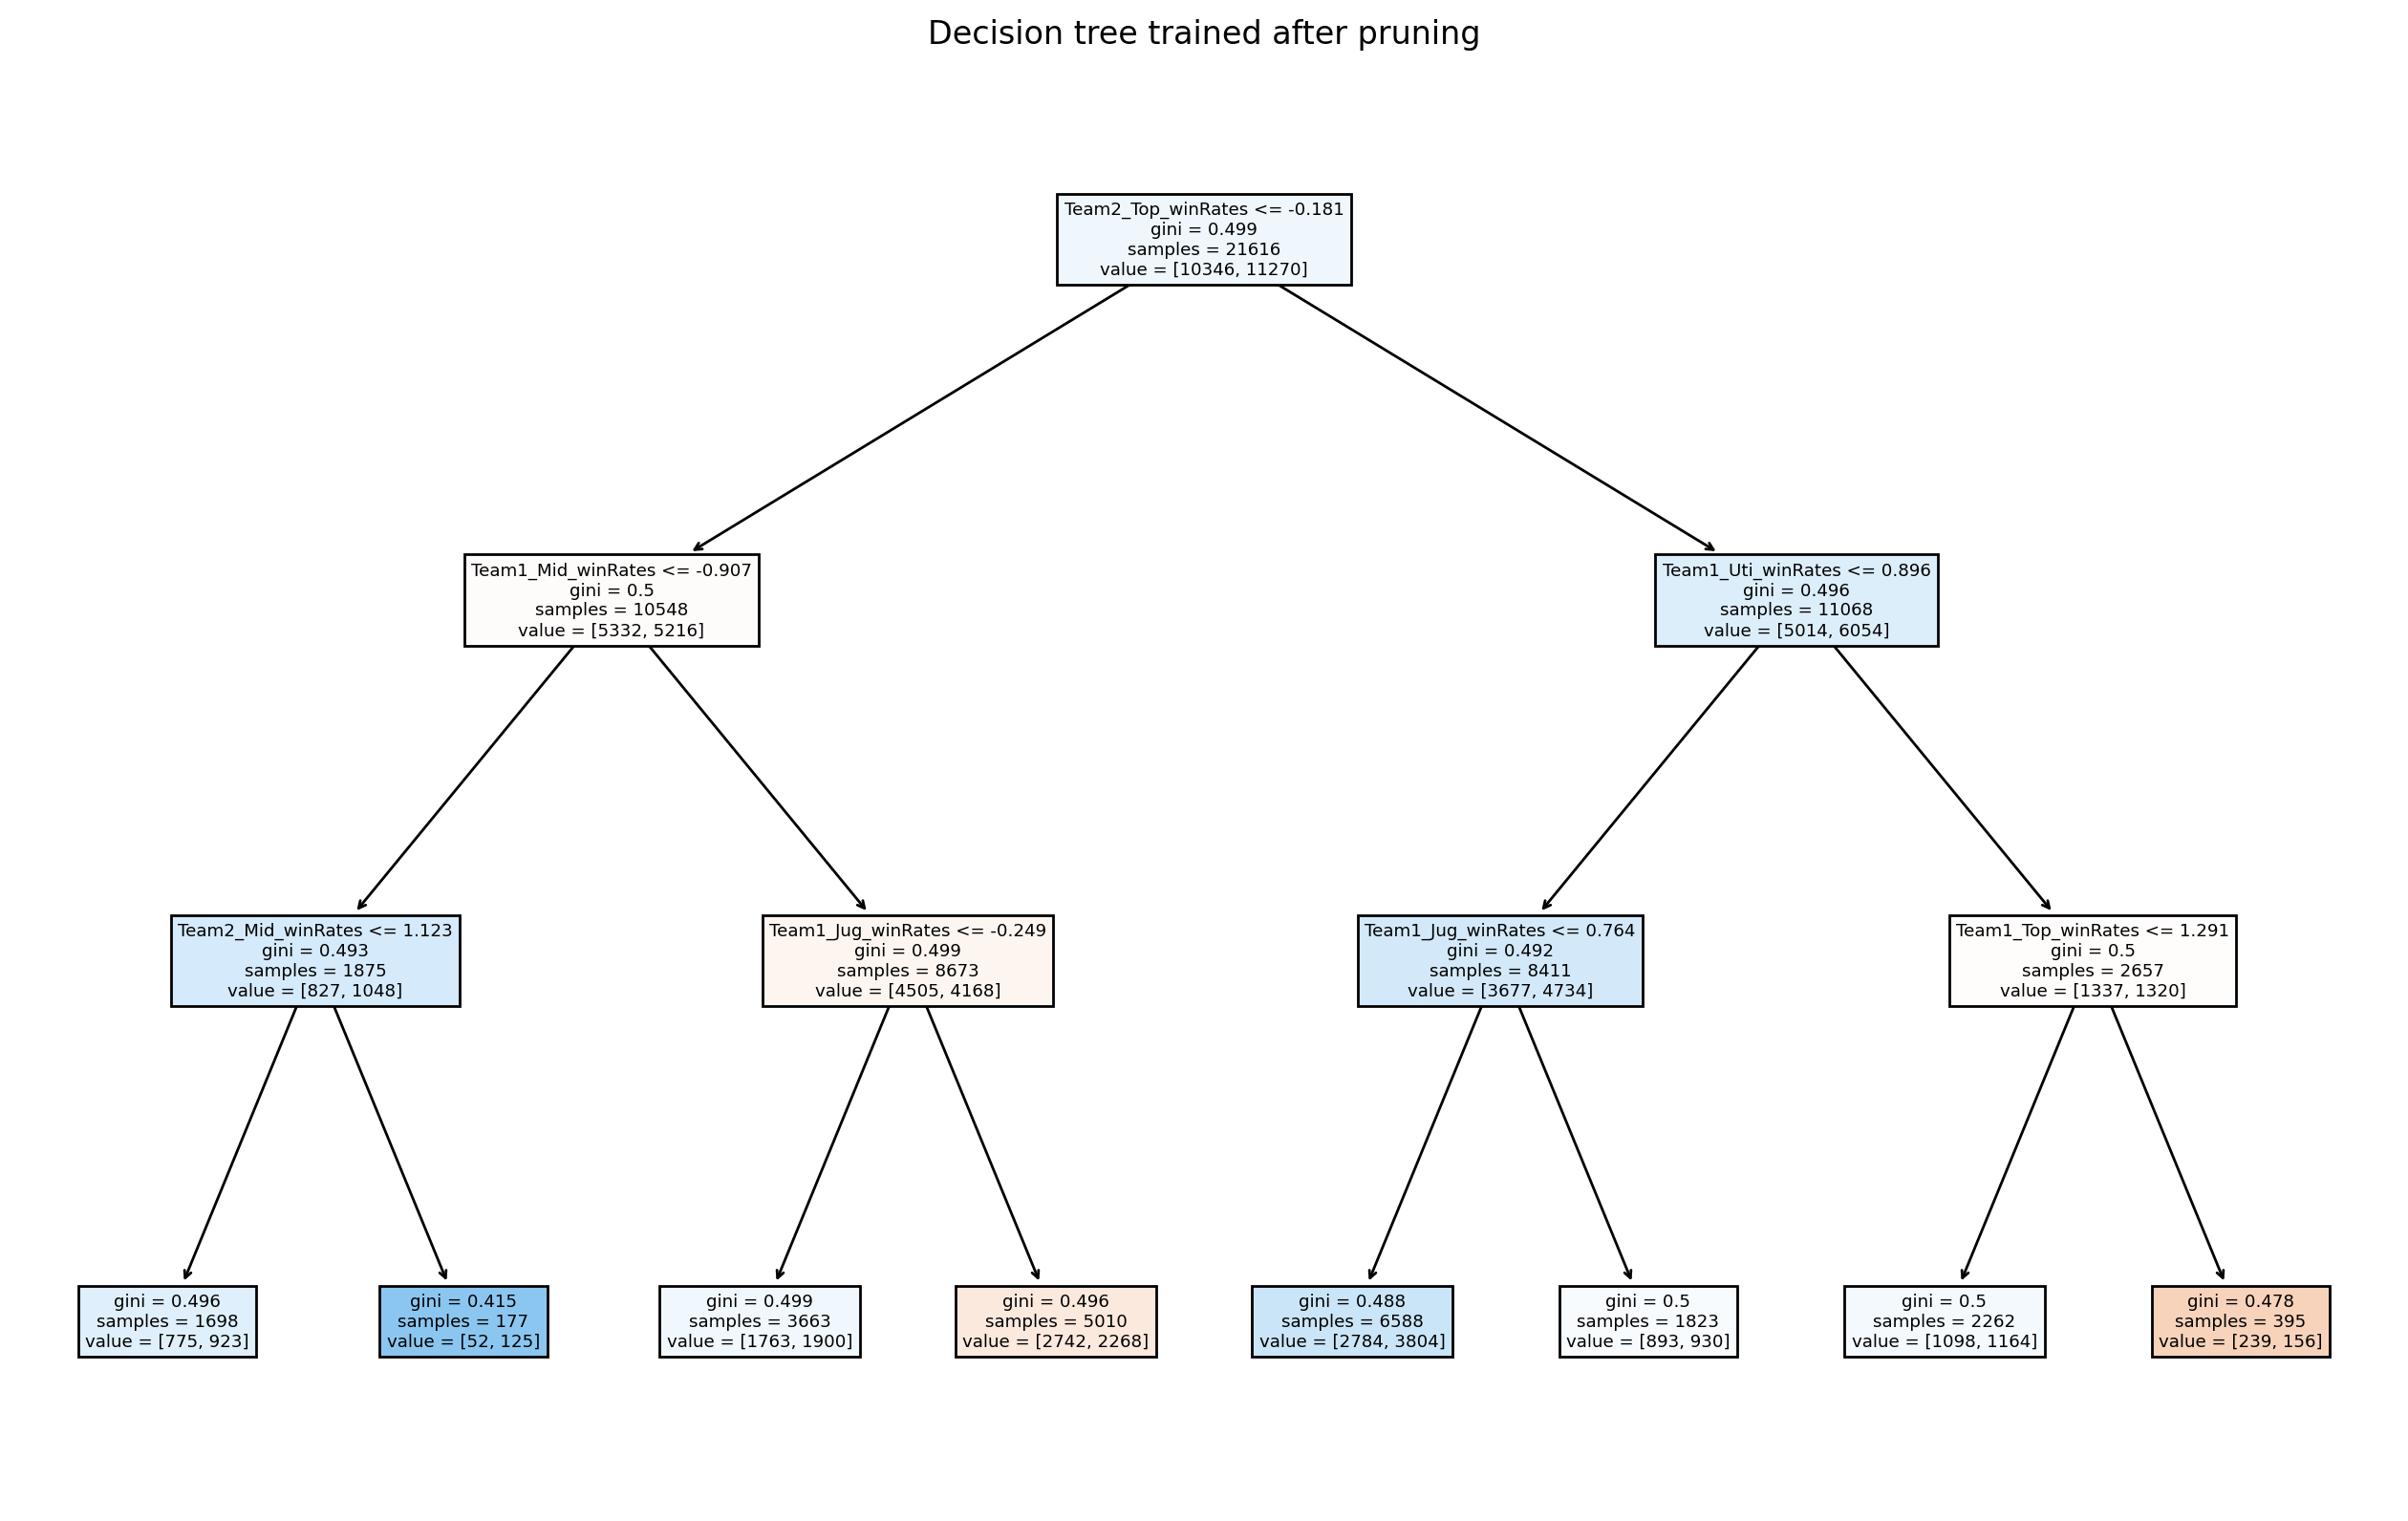

DecisionTreeClassifier(max_depth=3)

In [8]:
runModel(pre_all,3)
runModel(mid_all,3)
runModel(late_all,3)

In [9]:
df_test = pd.read_csv('./test.csv')


In [10]:
df_test

,Unnamed: 0,Top_counterScore,Jug_counterScore,Mid_counterScore,Bot_counterScore,Uti_counterScore,diff_TeamAttackScore,diff_TeamDefenseScore,diff_TeamWinRate,diff_TeamComboCount,diff_TeamControlScore,Team1_AttackDefenseBalanceScore,Team2_AttackDefenseBalanceScore,TeamVictory
0,0,0.0,0.0,0.0,0.0,1164.7,23.796,19.568,12.726,-1.0,-0.08994,-151.656,-155.884,100
1,1,0.0,0.0,0.0,0.0,0.0,170.586,49.704,-7.620,0.0,-0.08890,-139.296,-260.178,200


In [11]:
df_test = df_test.drop(['Unnamed: 0','TeamVictory'],axis=1)

In [12]:
df_test

,Top_counterScore,Jug_counterScore,Mid_counterScore,Bot_counterScore,Uti_counterScore,diff_TeamAttackScore,diff_TeamDefenseScore,diff_TeamWinRate,diff_TeamComboCount,diff_TeamControlScore,Team1_AttackDefenseBalanceScore,Team2_AttackDefenseBalanceScore
0,0.0,0.0,0.0,0.0,1164.7,23.796,19.568,12.726,-1.0,-0.08994,-151.656,-155.884
1,0.0,0.0,0.0,0.0,0.0,170.586,49.704,-7.620,0.0,-0.08890,-139.296,-260.178


In [18]:
pre

,Unnamed: 0,Top_counterScore,Jug_counterScore,Mid_counterScore,Bot_counterScore,Uti_counterScore,diff_TeamAttackScore,diff_TeamDefenseScore,diff_TeamWinRate,diff_TeamComboCount,diff_TeamControlScore,Team1_AttackDefenseBalanceScore,Team2_AttackDefenseBalanceScore,TeamVictory
0,0,-569.769231,-8.500000,-1597.315789,-1921.459091,1425.714286,-26.728,-85.524,-2.474,-1.0,-0.42042,-170.620,-229.416,100
1,1,-662.225806,-1107.869565,0.000000,-58.440000,-139.457143,10.102,0.622,-0.086,0.0,-0.12484,-168.976,-178.456,200
2,2,-714.315789,-423.875000,-472.241379,-1921.459091,-464.000000,0.534,35.238,0.138,0.0,-0.20374,-202.664,-167.960,200
3,3,-455.454545,-472.074074,608.932432,-2338.644444,410.300000,-31.714,-62.086,-5.316,-1.0,-0.08240,-153.022,-183.394,200
4,4,640.684211,-1075.000000,-420.983607,-597.052830,-301.200000,-26.140,71.988,-3.258,1.0,0.34540,-263.154,-165.026,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9845,9845,-370.222222,0.000000,0.000000,1099.854167,367.823529,25.160,36.706,4.946,0.0,-0.03392,-167.274,-155.728,100
9846,9846,0.000000,-154.949495,1621.933333,860.736842,1960.100000,44.122,-33.904,0.094,0.0,-0.00696,-124.410,-202.436,100
9847,9847,0.000000,138.190476,-207.529412,0.000000,-1324.254717,37.680,50.148,1.768,-1.0,0.25906,-191.892,-179.424,200
9848,9848,-311.636364,0.000000,0.000000,-83.076923,135.727891,14.396,-68.370,-5.622,0.0,-0.17414,-148.212,-230.978,200


              precision    recall  f1-score   support

         100       0.54      0.60      0.57      4643
         200       0.59      0.53      0.56      5111

    accuracy                           0.56      9754
   macro avg       0.56      0.56      0.56      9754
weighted avg       0.57      0.56      0.56      9754



<Figure size 432x288 with 0 Axes>

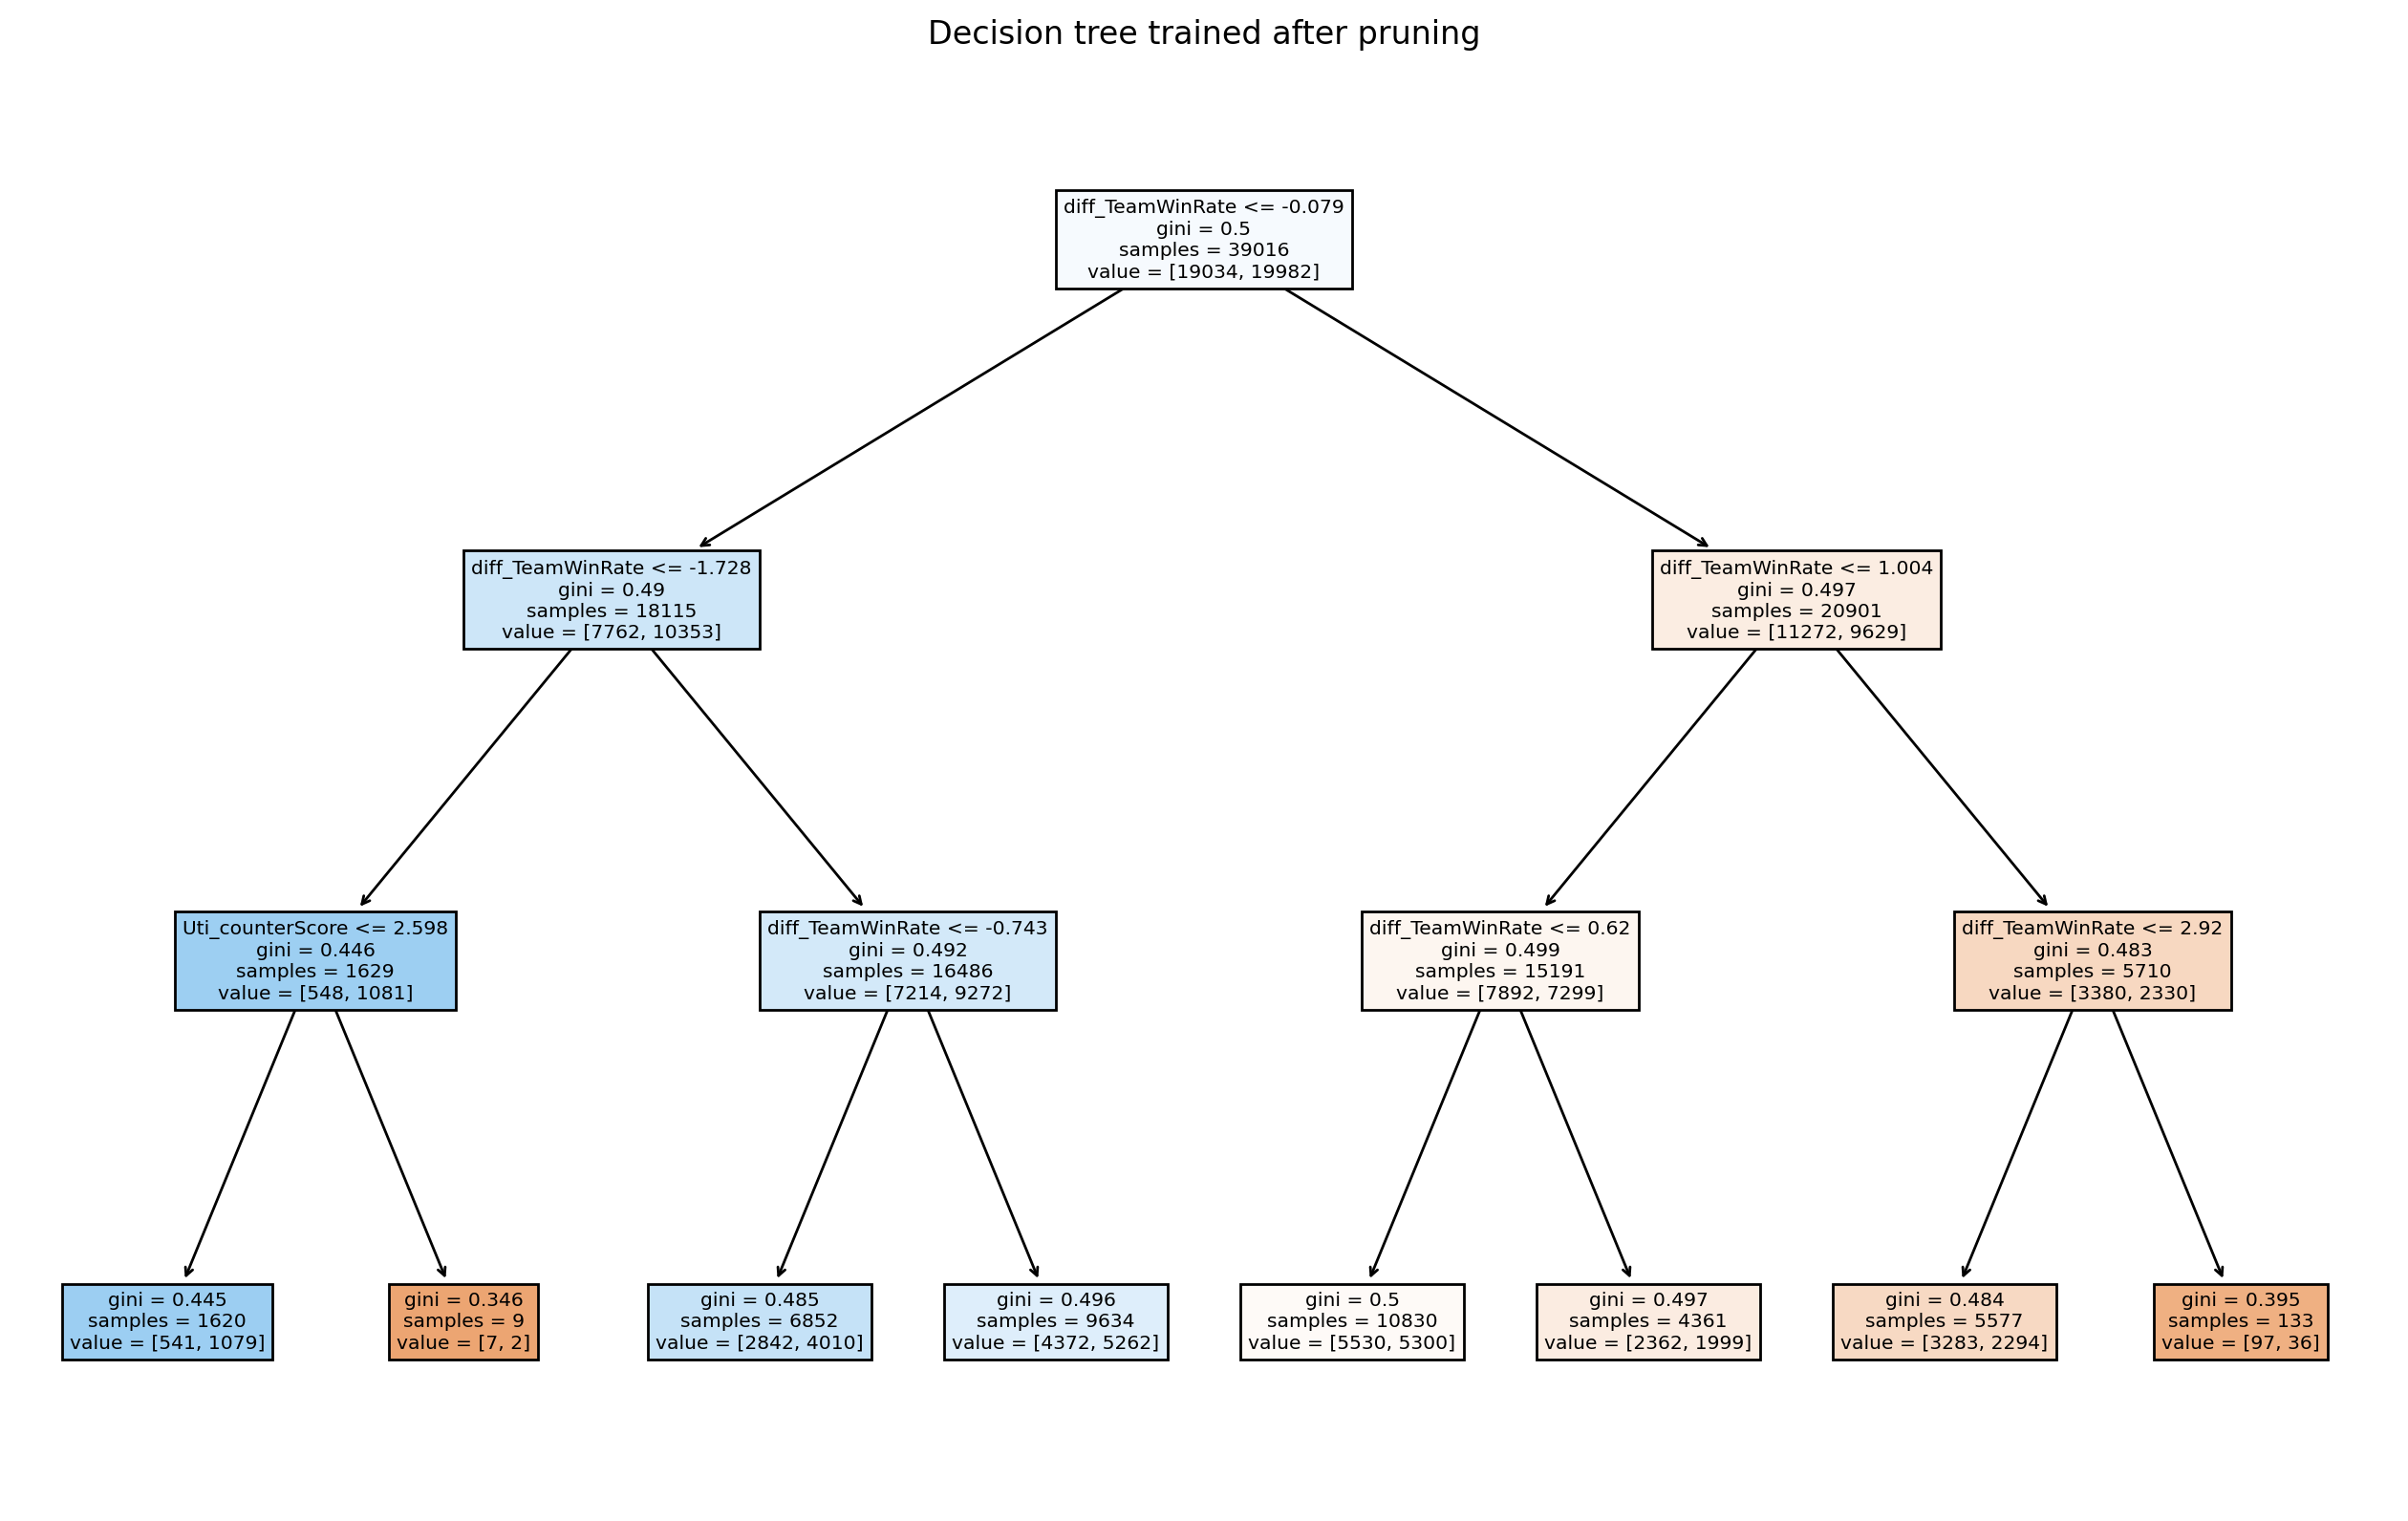

[100, 200]

In [20]:
list(runModel(mid,3).predict(df_test))